In [68]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

#### Linear Regression with Single Variable

In [69]:
data = [
    {'area': 2600, 'price': 550000},
    {'area': 3000, 'price': 565000},
    {'area': 3200, 'price': 610000},
    {'area': 3600, 'price': 680000},
    {'area': 4000, 'price': 725000},
]

df = pd.DataFrame(data)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


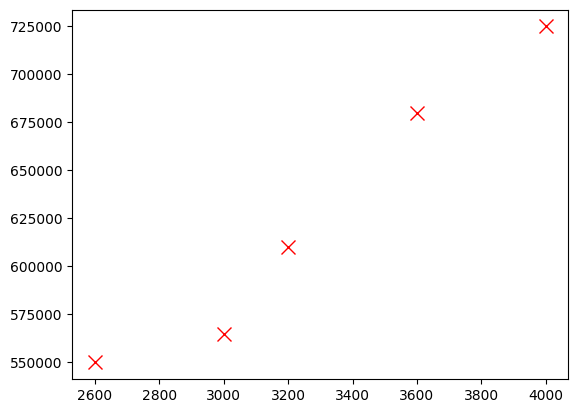

In [70]:
plt.plot(df['area'], df['price'], marker='x', linestyle='None', markersize=10, color='red')

In [71]:
# price(Y) = m * area(X) + c

reg = linear_model.LinearRegression()
reg.fit(df[['area']],df['price'])

LinearRegression()

In [72]:
# price of plot whose area is 3300 ? 
reg.predict([[3300]])

c:\Users\Pratham\Desktop\ml\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [73]:
# y = mx + c
# y = m * area + c
m, c = reg.coef_, reg.intercept_
print(f"m:{m}, c:{c}")

m:[135.78767123], c:180616.43835616432


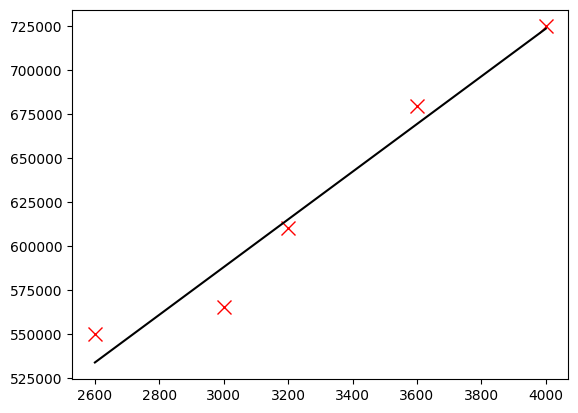

In [74]:
plt.plot(df['area'], df['price'], marker='x', linestyle='None', markersize=10, color='red')
plt.plot(df['area'],reg.predict(df[['area']]), color='black')

#### Linear Regression with Multiple Variables

In [75]:
data = [
    {'area': 2600,'bedrooms': 3, 'age': 20, 'price': 550000},
    {'area': 3000,'bedrooms': 4, 'age': 15, 'price': 565000},
    {'area': 3200,'age': 18, 'price': 610000},
    {'area': 3600,'bedrooms': 3, 'age': 30, 'price': 680000},
    {'area': 4000,'bedrooms': 5, 'age': 8, 'price': 725000},
]

df = pd.DataFrame(data)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000


In [77]:
# filling holes by median of column
median_bedrooms = math.floor((df['bedrooms'].median()))
df['bedrooms'].fillna(median_bedrooms, inplace=True)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,680000
4,4000,5.0,8,725000


In [80]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']],df['price'])

LinearRegression()

In [87]:
# y = m1x + m2x + m3x + c
# y = m1 * area + m2 * bedrooms + m3 * age + c
m, c = reg.coef_, reg.intercept_
print(f"m:{m}, c:{c}")

m:[  143.625 -6762.5     337.5  ], c:173112.5


In [90]:
# price of property of 3000 sqf, 3 bedrooms, 40 year old
reg.predict([[3000, 3, 40]])

c:\Users\Pratham\Desktop\ml\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([597200.])

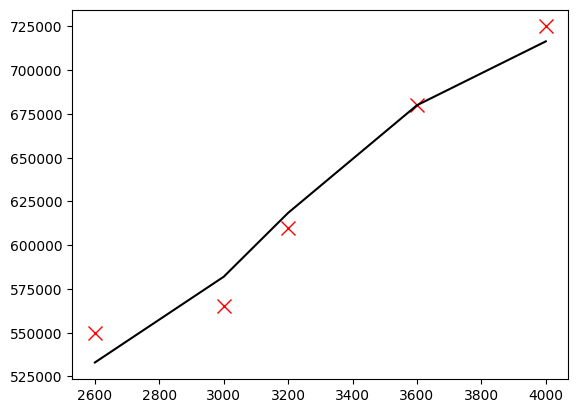

In [83]:
plt.plot(df['area'], df['price'], marker='x', linestyle='None', markersize=10, color='red')
plt.plot(df['area'],reg.predict(df[['area', 'bedrooms', 'age']]), color='black')

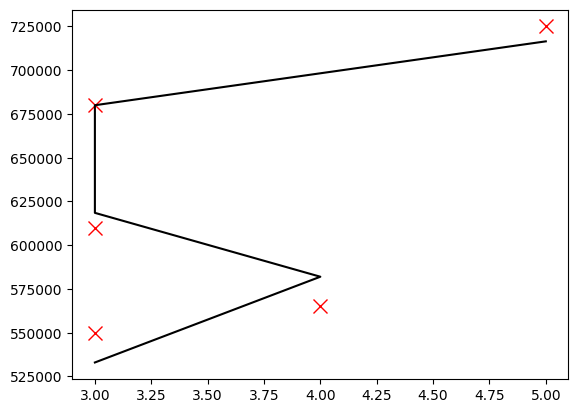

In [84]:
plt.plot(df['bedrooms'], df['price'], marker='x', linestyle='None', markersize=10, color='red')
plt.plot(df['bedrooms'],reg.predict(df[['area', 'bedrooms', 'age']]), color='black')

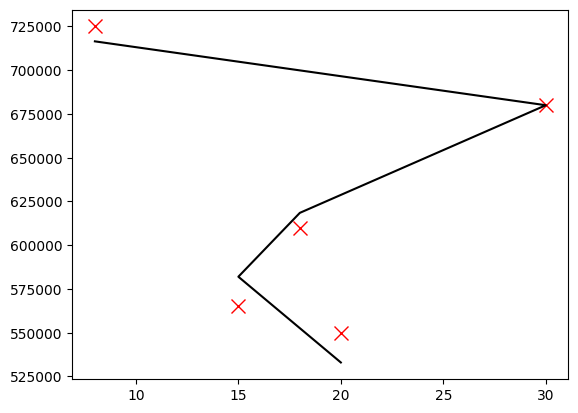

In [85]:
plt.plot(df['age'], df['price'], marker='x', linestyle='None', markersize=10, color='red')
plt.plot(df['age'],reg.predict(df[['area', 'bedrooms', 'age']]), color='black')